## **What is Trend**
The trend component of a time series represents a persistent, long-term change in the mean of the series. The trend is the slowest-moving part of a series, the part representing the largest time scale of importance. More generally, any persistent and slow-movign change in a series could constitute a trend.

## **Moving Average Plots**

To compute a moving average of a time series, we compute the average of the values within a sliding window of some defined width. The idea is to smooth out any short-term fluctuations in the series so that only long-term changes remain.  
  
![Something-something](https://storage.googleapis.com/kaggle-media/learn/images/EZOXiPs.gif) 

## **Engineering Trend**
Once we've identified the shape of the trend, we can attempt to model it using a time-step feature. We've already seen how using the time dummy itself will model a linear trend:
~~~
target = a * time + b
~~~
  
We can fit many other kinds of trend through transformation of the time dummy. If the trend appears to be quadratic (a parabola), we just need to add the square of the time dummy to the feature set, giving us:
~~~
target = a * time ** 2 + b * time + c
~~~
  
![](https://storage.googleapis.com/kaggle-media/learn/images/KFYlgGm.png)

## **Example - Tunnel Trafic**

In [4]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# Load Tunnel Traffic dataset
folder_path = "C:/Users/Rizki Maulana/OneDrive/Desktop/Documents/University/datsci/Data/ts_course_data"
tunnel = pd.read_csv(folder_path + "/tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period()

Creating a moving average using `rolling` method. 

<AxesSubplot: title={'center': 'Tunnel Traffic - 365-Day Moving Average'}, xlabel='Day'>

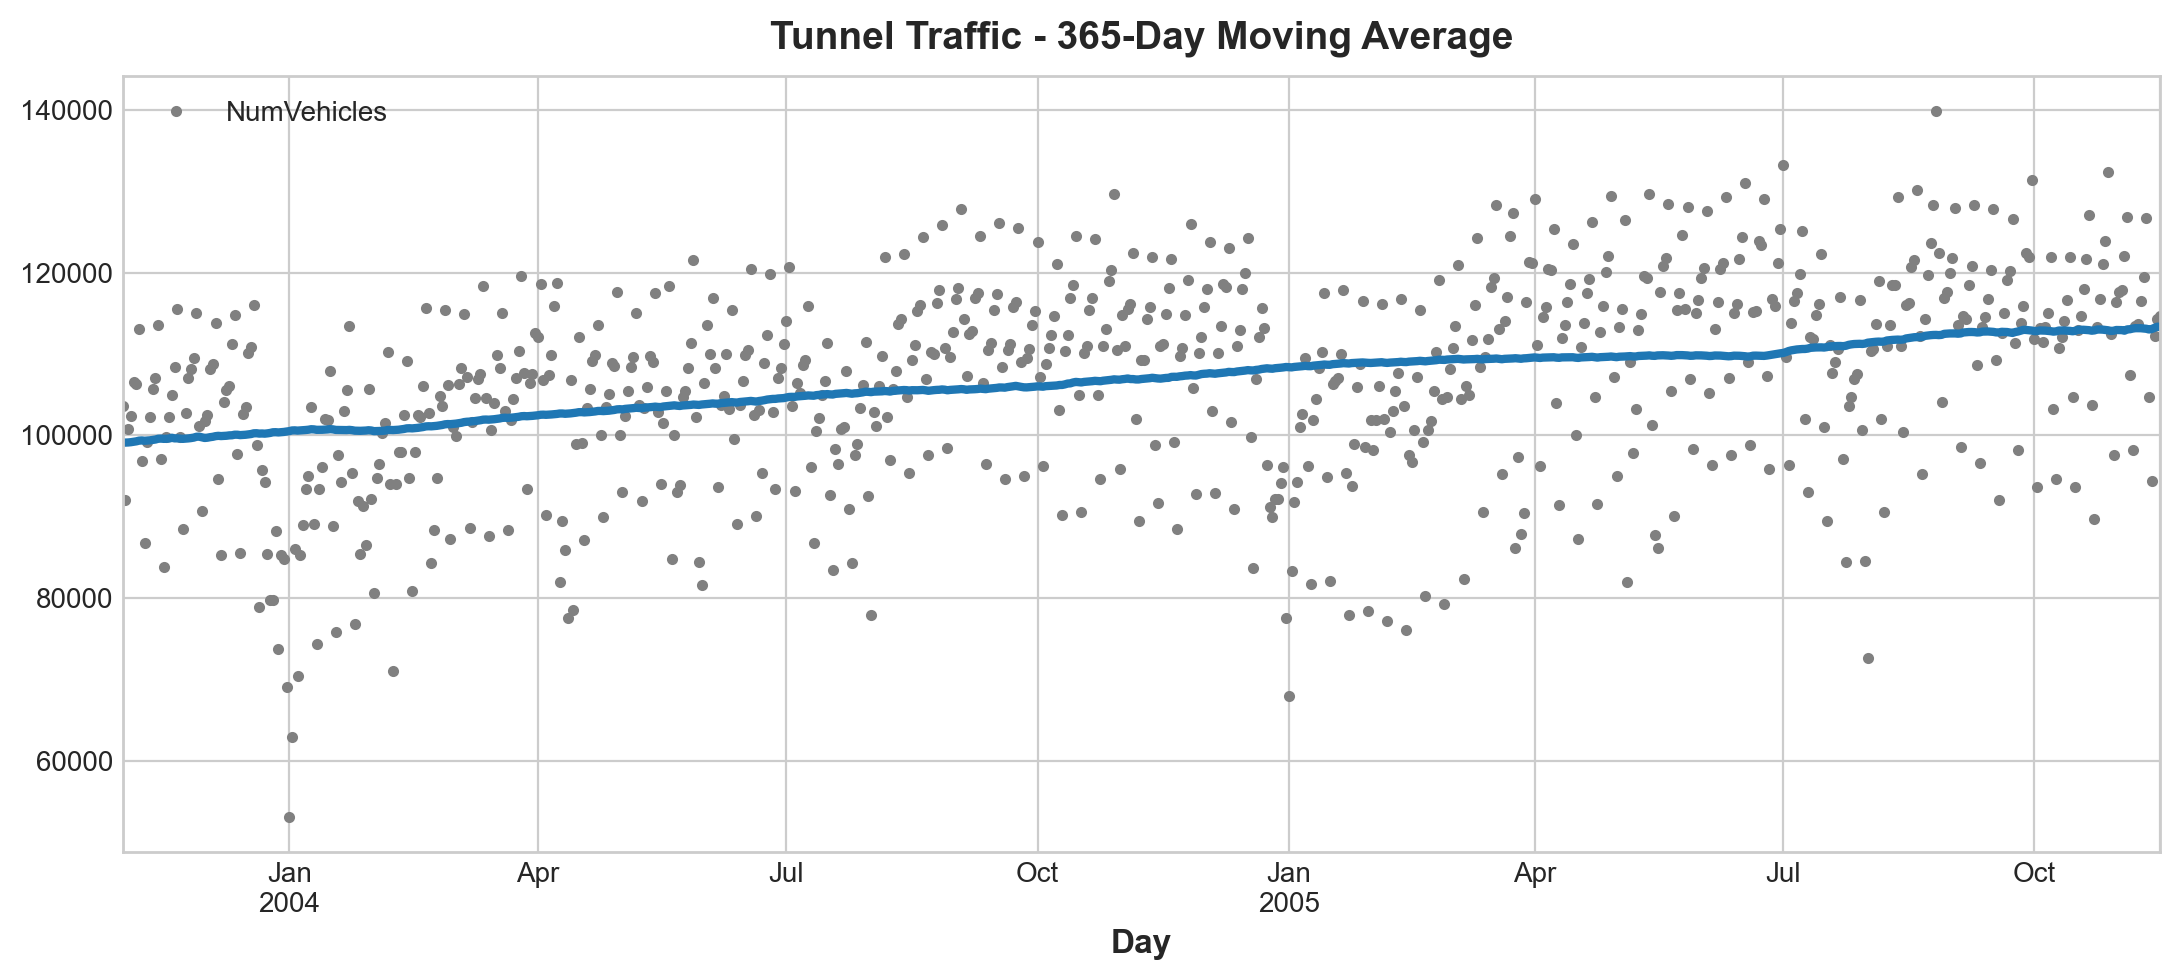

In [5]:
moving_average = tunnel.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = tunnel.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Tunnel Traffic - 365-Day Moving Average", legend=False,
)